In [1]:
import cv2
import numpy as np
import glob

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
IMAGE_DEBUG = False

In [3]:
image_files = glob.glob('./input/*.png')
print(image_files)

['./input/dice1.png', './input/dice3.png', './input/dice2.png', './input/dice6.png', './input/dice5.png', './input/dice4.png']


In [4]:
def displayImage(image,win_name='Image'):
    if IMAGE_DEBUG:
        cv2.namedWindow(win_name)
        cv2.imshow(win_name,image)
        cv2.waitKey(0)
        cv2.destroyWindow(win_name)
        cv2.waitKey(1)
    

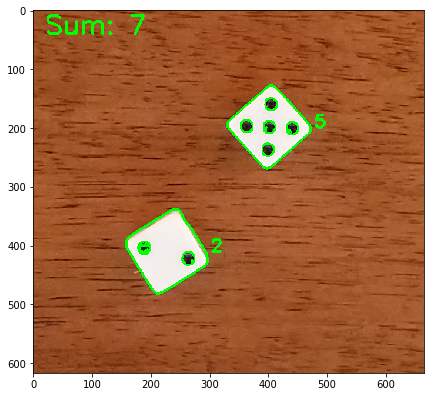

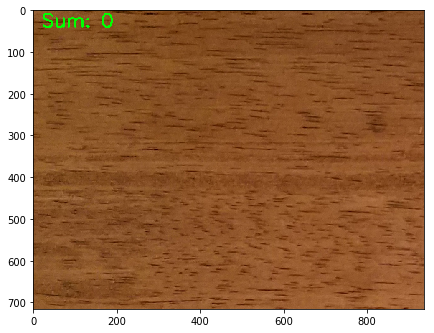

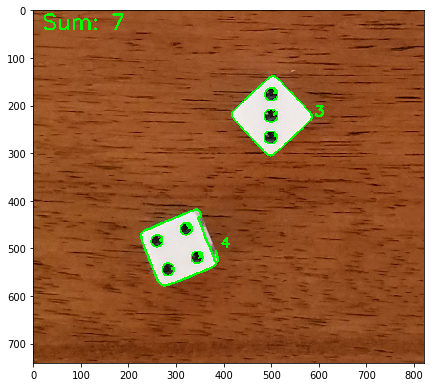

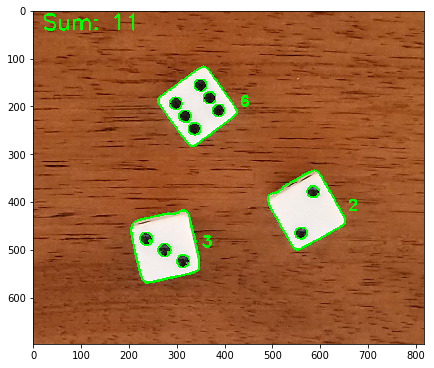

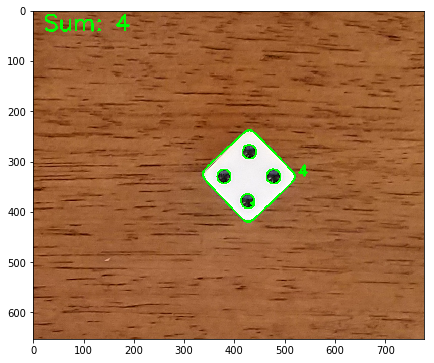

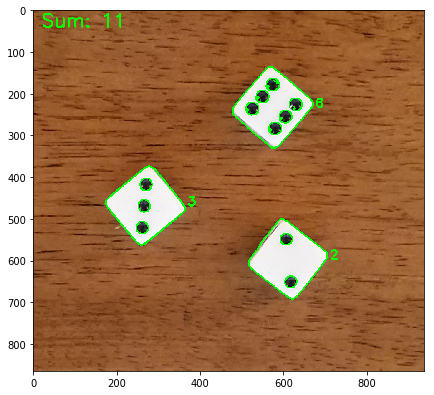

In [6]:
for imgf in image_files:
    # get image file
    img = cv2.imread(imgf)
    displayImage(img,imgf)
    
    #
    # find all dies in the image
    #
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    displayImage(gray,"gray " + imgf)
    
    # this finds edges of objects in the image
    blurred = cv2.blur(gray,(3,3))
    displayImage(blurred,"blurred "+ imgf)
    edges = cv2.Canny(blurred,100,500)
    displayImage(edges,"edges "+imgf)
    
    # isolate the objects by finding object contours
    die_contours,_ = cv2.findContours(edges,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

    # look for die objects in the contours list
    number_dots = 0
    for c in die_contours:

        # get location and size of object
        (die_x,die_y,die_w, die_h) = cv2.boundingRect(c)
        
        # based on edge detection and establishing contours around edges
        # die objects are assumed to have width > 100 pixels and height > 100 pixels
        if die_w > 100 and die_h > 100:
            #cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),2)
            die_img = img[die_y:die_y+die_h,die_x:die_x+die_w]
            displayImage(die_img,"extracted die")

            # find dots on the die object
            die_gray = cv2.cvtColor(die_img, cv2.COLOR_BGR2GRAY)
            displayImage(die_gray,"extracted die")
            die_blurred = cv2.blur(die_gray,(1,1))
            displayImage(die_blurred,"blurred die")
            die_gray = cv2.Canny(die_blurred,100,700)
            
            # find contours of the dots
            dot_contours, _ = cv2.findContours(die_gray,cv2.RETR_LIST ,cv2.CHAIN_APPROX_SIMPLE)
            
            # filter out contours that do not conform to size of dots and eliminate duplicates
            dots = list(set([cv2.boundingRect(c2) for c2 in dot_contours
                     if (cv2.boundingRect(c2)[2]>=20 and cv2.boundingRect(c2)[2]<=40) and
                     (cv2.boundingRect(c2)[3]>=20 and cv2.boundingRect(c2)[3]<=40)
                ]))

            # outline each found dot
            for c2 in dot_contours:
                if (cv2.boundingRect(c2)[2]>=20 and cv2.boundingRect(c2)[2]<=40) and\
                    (cv2.boundingRect(c2)[3]>=20 and cv2.boundingRect(c2)[3]<=40):
                        
                    offset = np.array([die_x,die_y])
                    
                    cv2.drawContours(img,[c2+offset],0,(0,255,0),2)
            
            # count number of dots
            number_dots += len(dots)
            win_name = 'dots {:d}'.format(len(dots))
            displayImage(die_img,win_name)
            
            
            #display original image with dots identified and number of dots
            cv2.drawContours(img, [c], 0, (0,255,0), 3)
            bbox = cv2.boundingRect(c)
            img = cv2.putText(img,str(len(dots)),
                              (bbox[0]+bbox[2]+5,bbox[1]+bbox[3]//2),
                             cv2.FONT_HERSHEY_SIMPLEX,1.0,(0,255,0),3,True)
            displayImage(img,"annotated die")
            
        
    # output total number of dots on image
    img = cv2.putText(img,"Sum: " + str(number_dots), (20,40),
                     cv2.FONT_HERSHEY_SIMPLEX,1.5, (0,255,0),3,False)
    displayImage(img,"Final Image")
    
    plt.figure(figsize=(7,8))
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))  #convert from opencv BGR to matplotlib RGB
    
    #save to output file
    # create output name
    file_name_parts = imgf.split('/')
    output_name = './output/output_' + file_name_parts[2]
    cv2.imwrite(output_name,img)
        
        
#displayImage(img3)